<h1>Breast Cancer Classification</h1>

In this notebook, I begin with data cleaning and pre-processing and move on to prediction followed by optimization of the observed results. First, let's import all the necessary modules.

In [14]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import time
plt.style.use('fivethirtyeight')

<h2>Data Cleaning and Preliminary Analysis </h2>

Next, we read the data 

In [15]:
data= pd.read_csv("breast_cancer.csv")

Before performing feature selection,feature extraction and classification, let's start with basic data analysis. Lets look at features of data.

In [16]:
data.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


There are 3 things that take my attention: 
<br>1) There is an id that cannot be used for classificaiton 
<br>2) Diagnosis is our class label 
<br>3) Unnamed: 32 feature includes NaN so we do not need it. 
<br>Therefore, drop these unnecessary features. However do not forget this is not a feature selection. 

In [17]:
data.drop(['Unnamed: 32','id'],axis=1,inplace=True)

In [18]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


Now, we need to check the structure of the data at hand.

In [19]:
data.shape

(569, 31)

So the data has 569 cancer records with 31 attributes. Next, we will see how this data is distributed around our target variable, i.e, Diagnosis.

('Number of Benign: ', 357)
('Number of Malignant : ', 212)


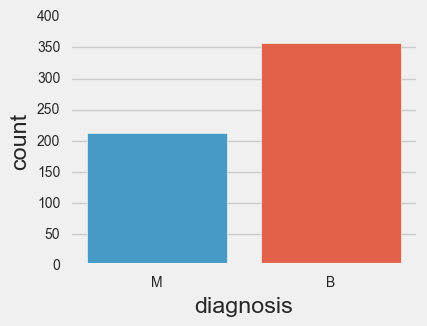

In [20]:
plt.subplots(figsize=(4,3))
ax = sns.countplot(data.diagnosis,label="Count")       # M = 212, B = 357
B, M = data.diagnosis.value_counts()
print('Number of Benign: ',B)
print('Number of Malignant : ',M)
plt.show()

Since our labels are letters, I will convert them to numbers so that we can work with them.

<h2>Understading the Data with Visualizations</h2>

<h3>Starting out with the Radius of the Tumor</h3>

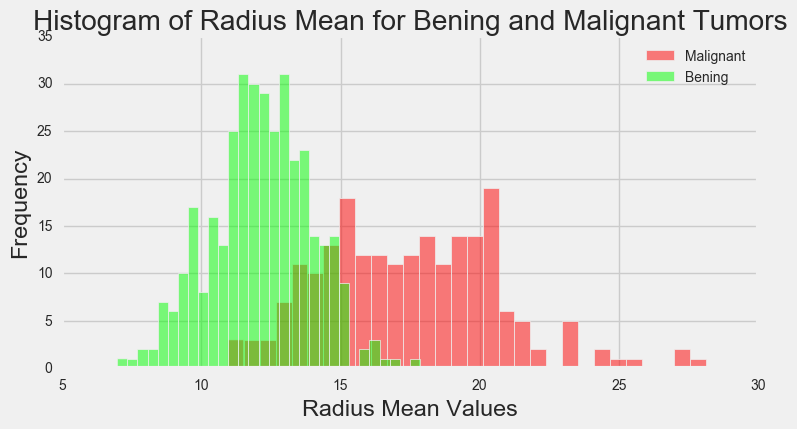

('Most frequent malignant radius mean is: ', 20.101999999999997)


In [27]:
plt.figure(figsize=(8,4))
m = plt.hist(data[data["diagnosis"] == "M"].radius_mean,bins=30,fc = (1,0,0,0.5),label = "Malignant")
b = plt.hist(data[data["diagnosis"] == "B"].radius_mean,bins=30,fc = (0,1,0,0.5),label = "Bening")
plt.legend()
plt.xlabel("Radius Mean Values")
plt.ylabel("Frequency")
plt.title("Histogram of Radius Mean for Bening and Malignant Tumors")
plt.show()
frequent_malignant_radius_mean = m[0].max()
index_frequent_malignant_radius_mean = list(m[0]).index(frequent_malignant_radius_mean)
most_frequent_malignant_radius_mean = m[1][index_frequent_malignant_radius_mean]
print("Most frequent malignant radius mean is: ",most_frequent_malignant_radius_mean)

<h3>Analysing Outliers using the above Histogram</h3>

In [37]:
data_bening = data[data["diagnosis"] == "B"]
data_malignant = data[data["diagnosis"] == "M"]
desc = data_bening.radius_mean.describe()
Q1 = desc[4]
Q3 = desc[6]
IQR = Q3-Q1
lower_bound = Q1 - 1.5*IQR
upper_bound = Q3 + 1.5*IQR
print("Anything outside this range is an outlier: (", lower_bound ,",", upper_bound,")")
data_bening[data_bening.radius_mean < lower_bound].radius_mean
print("Outliers: ",data_bening[(data_bening.radius_mean < lower_bound) | (data_bening.radius_mean > upper_bound)].radius_mean.values)

('Anything outside this range is an outlier: (', 7.6450000000000014, ',', 16.805, ')')
('Outliers: ', array([  6.981,  16.84 ,  17.85 ]))


<h3>Validating the Outliers using a Box Plot</h3>

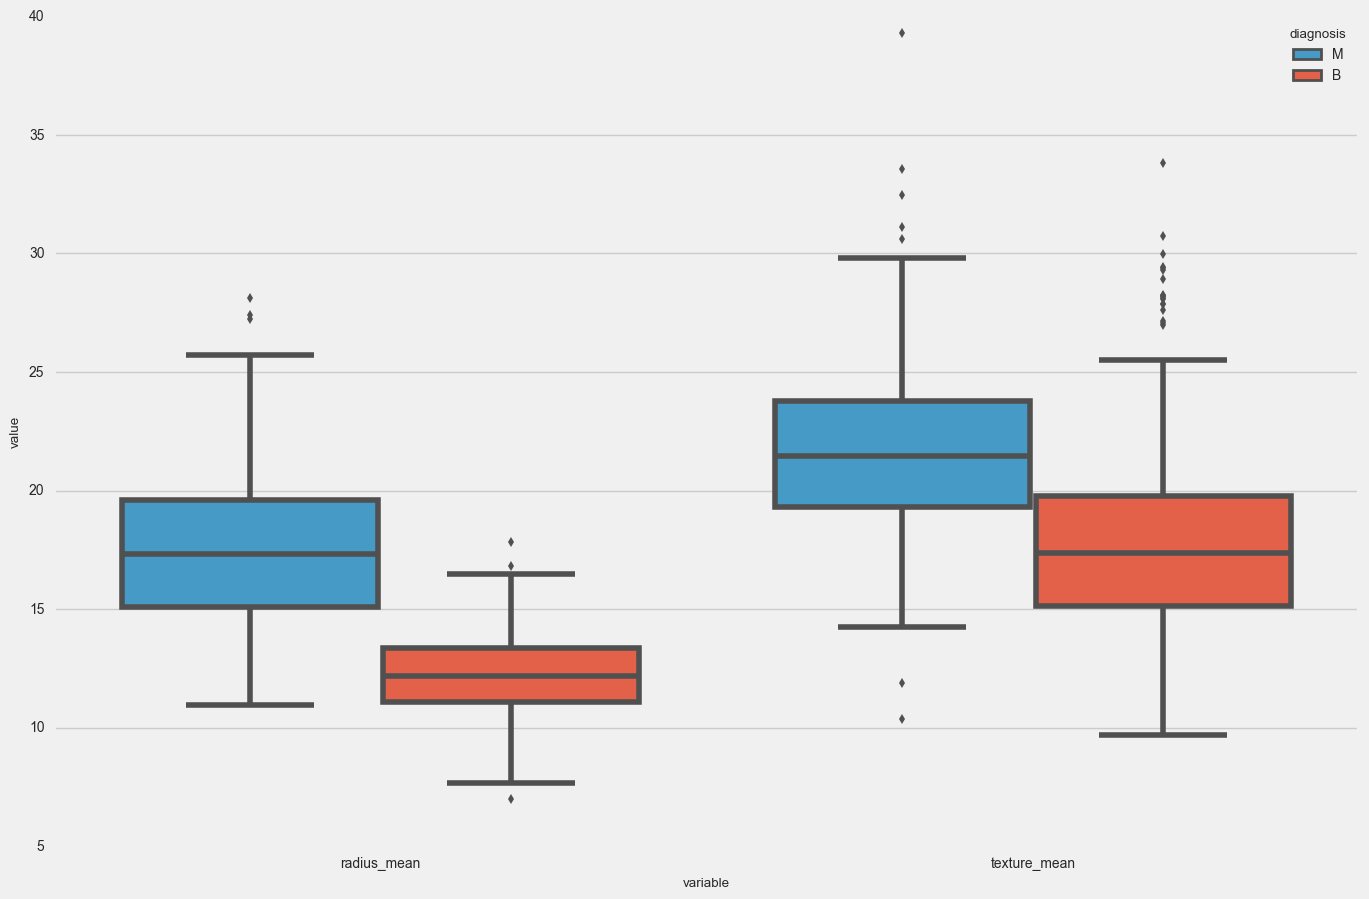

In [42]:
melted_data = pd.melt(data,id_vars = "diagnosis",value_vars = ['radius_mean', 'texture_mean'])
plt.figure(figsize = (15,10))
sns.boxplot(x = "variable", y = "value", hue="diagnosis",data= melted_data)
plt.show()

<h3>Spreading out our Visualizations to effectively analyze the other features</h3>

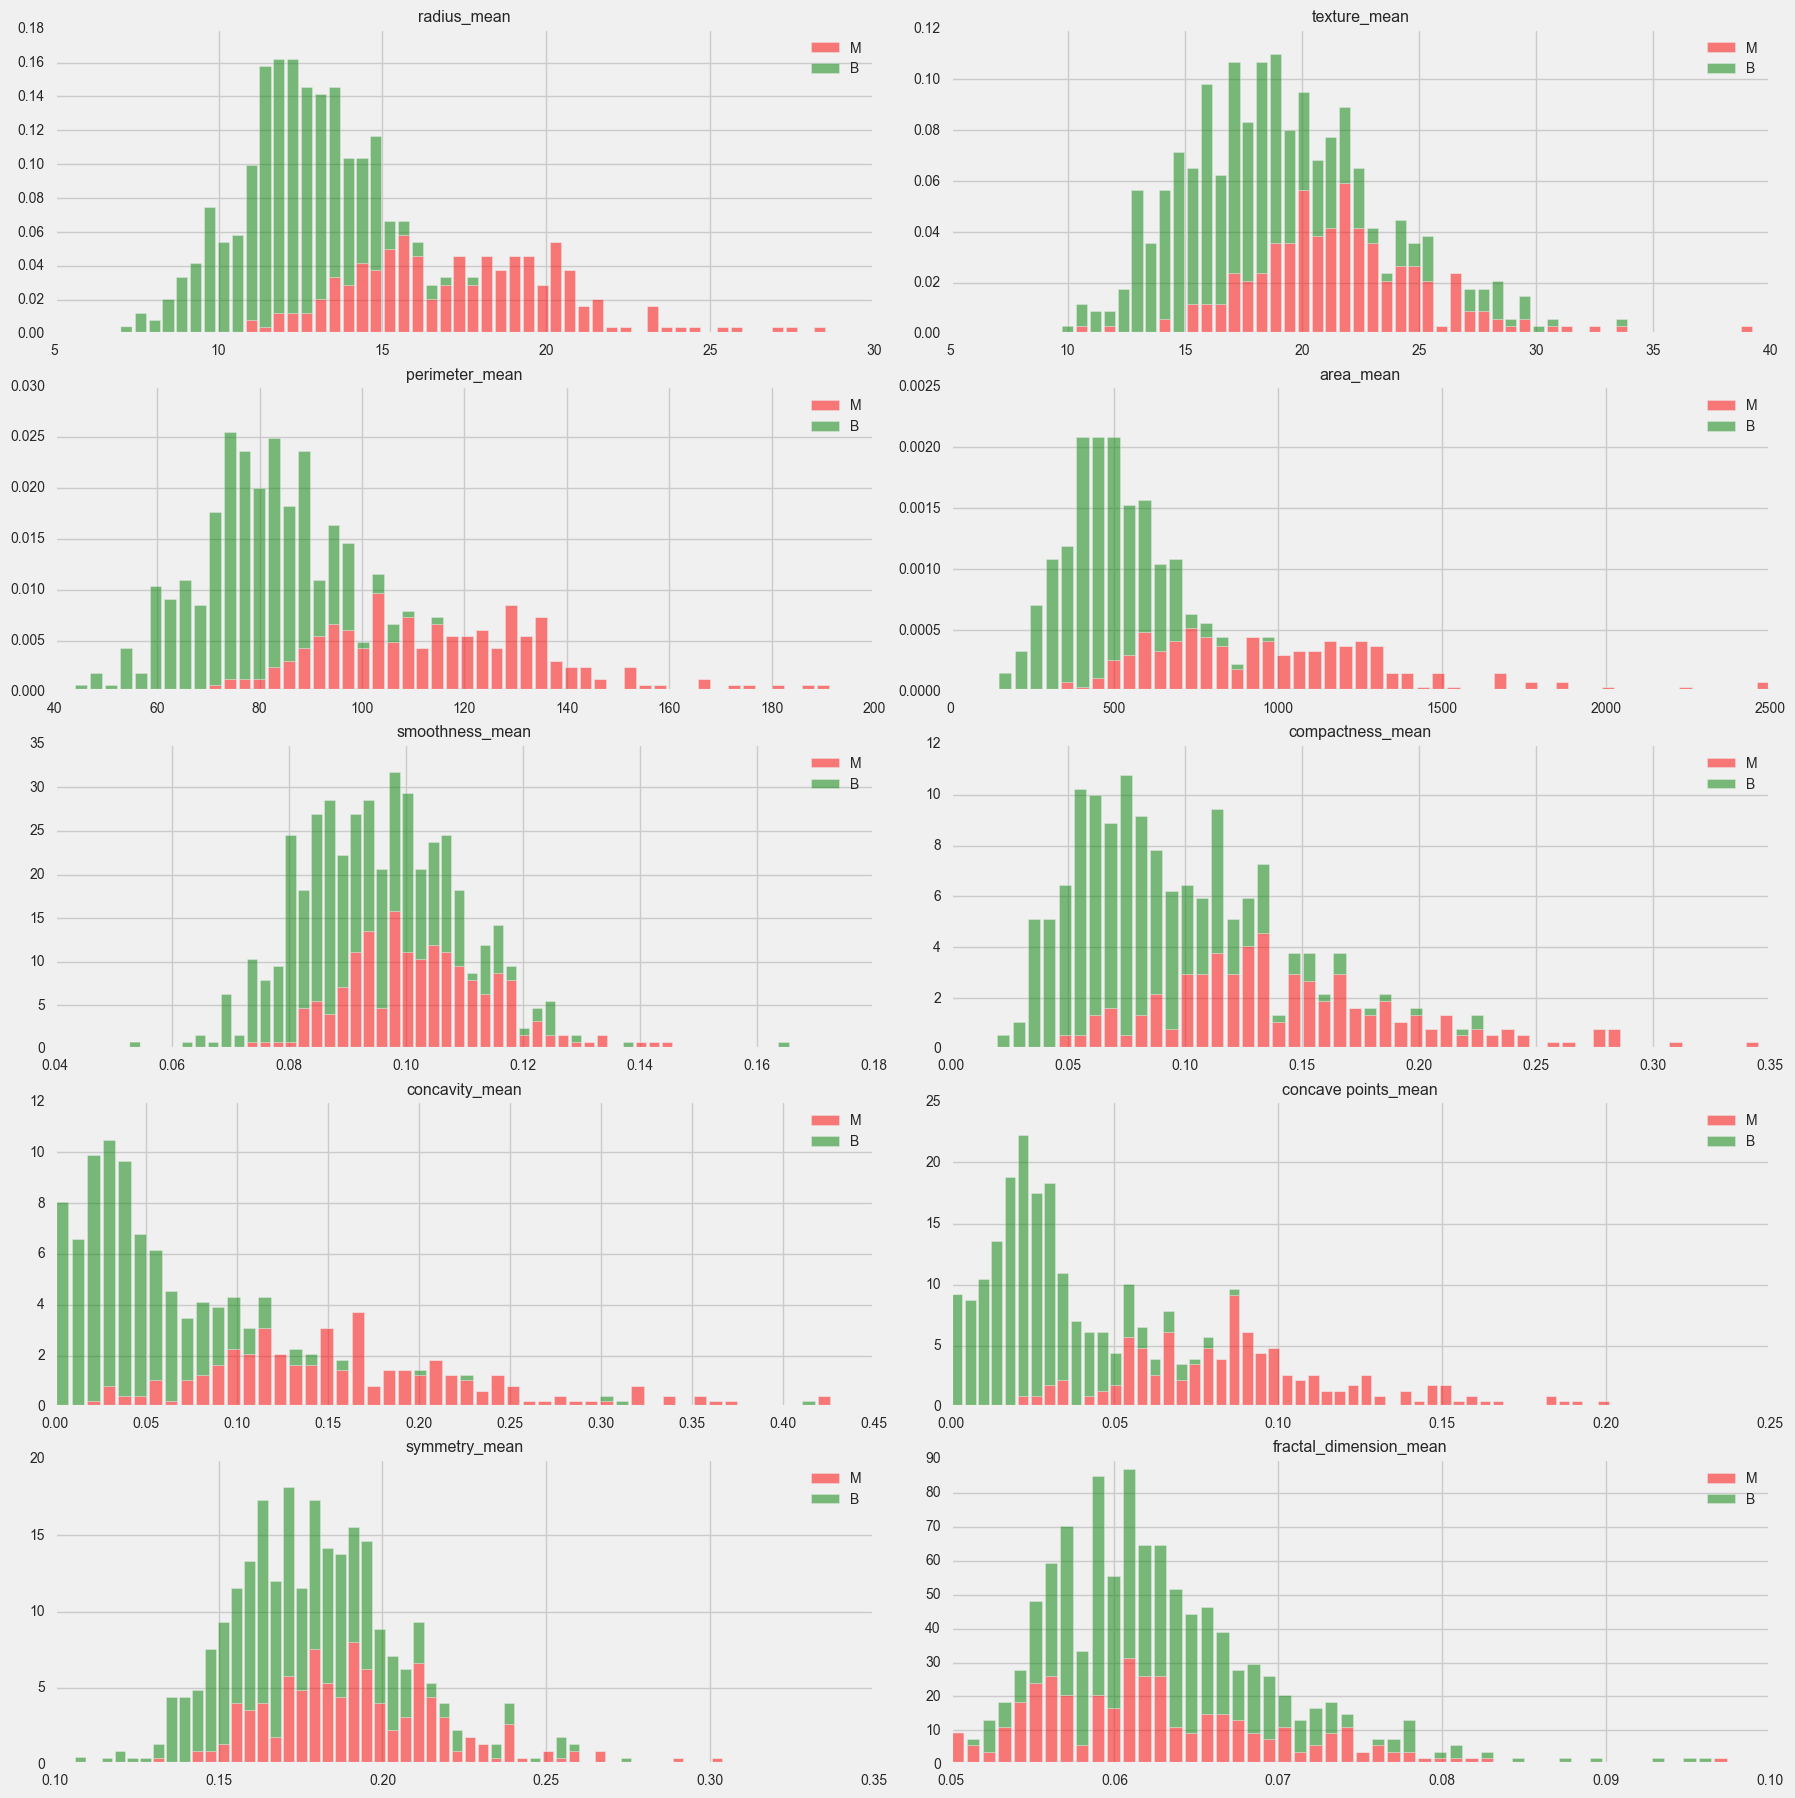

In [30]:
features_mean=list(data.columns[1:11])
# split dataframe into two based on diagnosis
dfM=data[data['diagnosis'] =="M"]
dfB=data[data['diagnosis'] =="B"]
plt.rcParams.update({'font.size': 8})
fig, axes = plt.subplots(nrows=5, ncols=2, figsize=(18,18))
axes = axes.ravel()
for idx,ax in enumerate(axes):
    ax.figure
    binwidth= (max(data[features_mean[idx]]) - min(data[features_mean[idx]]))/50
    ax.hist([dfM[features_mean[idx]],dfB[features_mean[idx]]], bins=np.arange(min(data[features_mean[idx]]), max(data[features_mean[idx]]) + binwidth, binwidth) , alpha=0.5,stacked=True, normed = True, label=['M','B'],color=['r','g'])
    ax.legend(loc='upper right')
    ax.set_title(features_mean[idx])
plt.tight_layout()
plt.show()

We can interpret one more thing about plot above, variable of concavity_worst and concave point_worst looks like similar.(Not always true but, basically if the features are correlated with each other we can drop one of them)

In order to compare two features deeper, lets use joint plot. Pearsonr value is correlation value and 1 is the highest. Therefore, 0.86 is looks enough to say that they are correlated. 

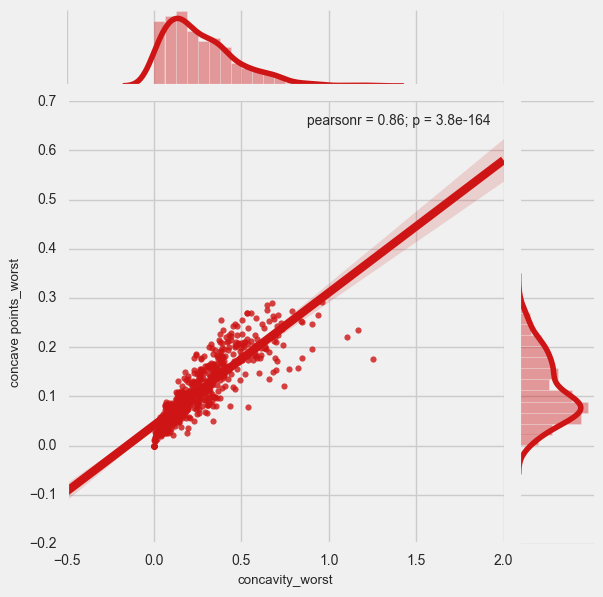

In [31]:
plt.figure(figsize=(3,3))
x=data
sns.jointplot(x.loc[:,'concavity_worst'], x.loc[:,'concave points_worst'], kind="regg", color="#ce1414")
plt.show()

For three or more feauture comparision we can use pair grid plot. radius_worst, perimeter_worst and area_worst are correlated as it can be seen pair grid plot. 

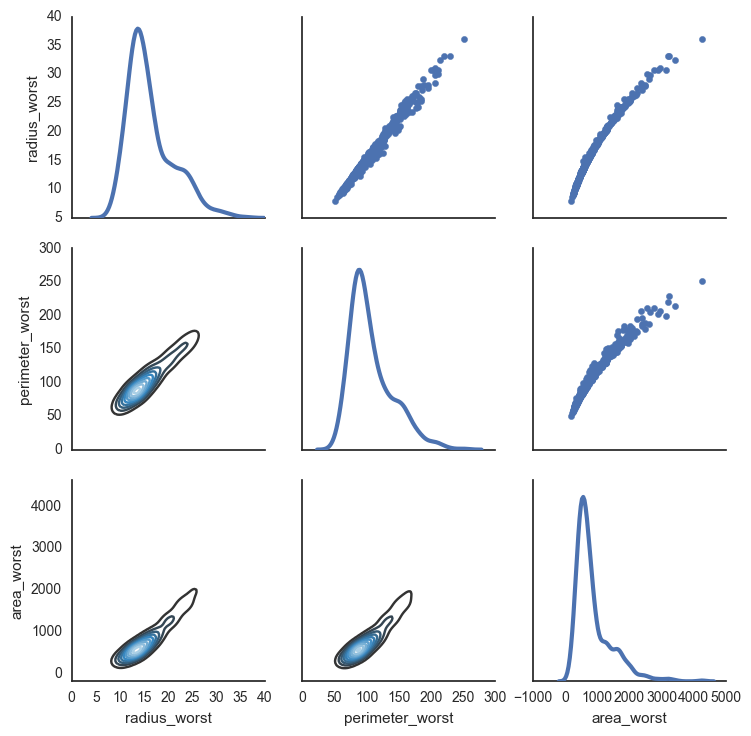

In [26]:
plt.figure(figsize=(1,1))
sns.set(style="white")
df = x.loc[:,['radius_worst','perimeter_worst','area_worst']]
g = sns.PairGrid(df, diag_sharey=False)
g.map_lower(sns.kdeplot, cmap="Blues_d")
g.map_upper(plt.scatter)
g.map_diag(sns.kdeplot, lw=3)
plt.show()

<h3>Increasing our analysis from three featurest to six</h3>

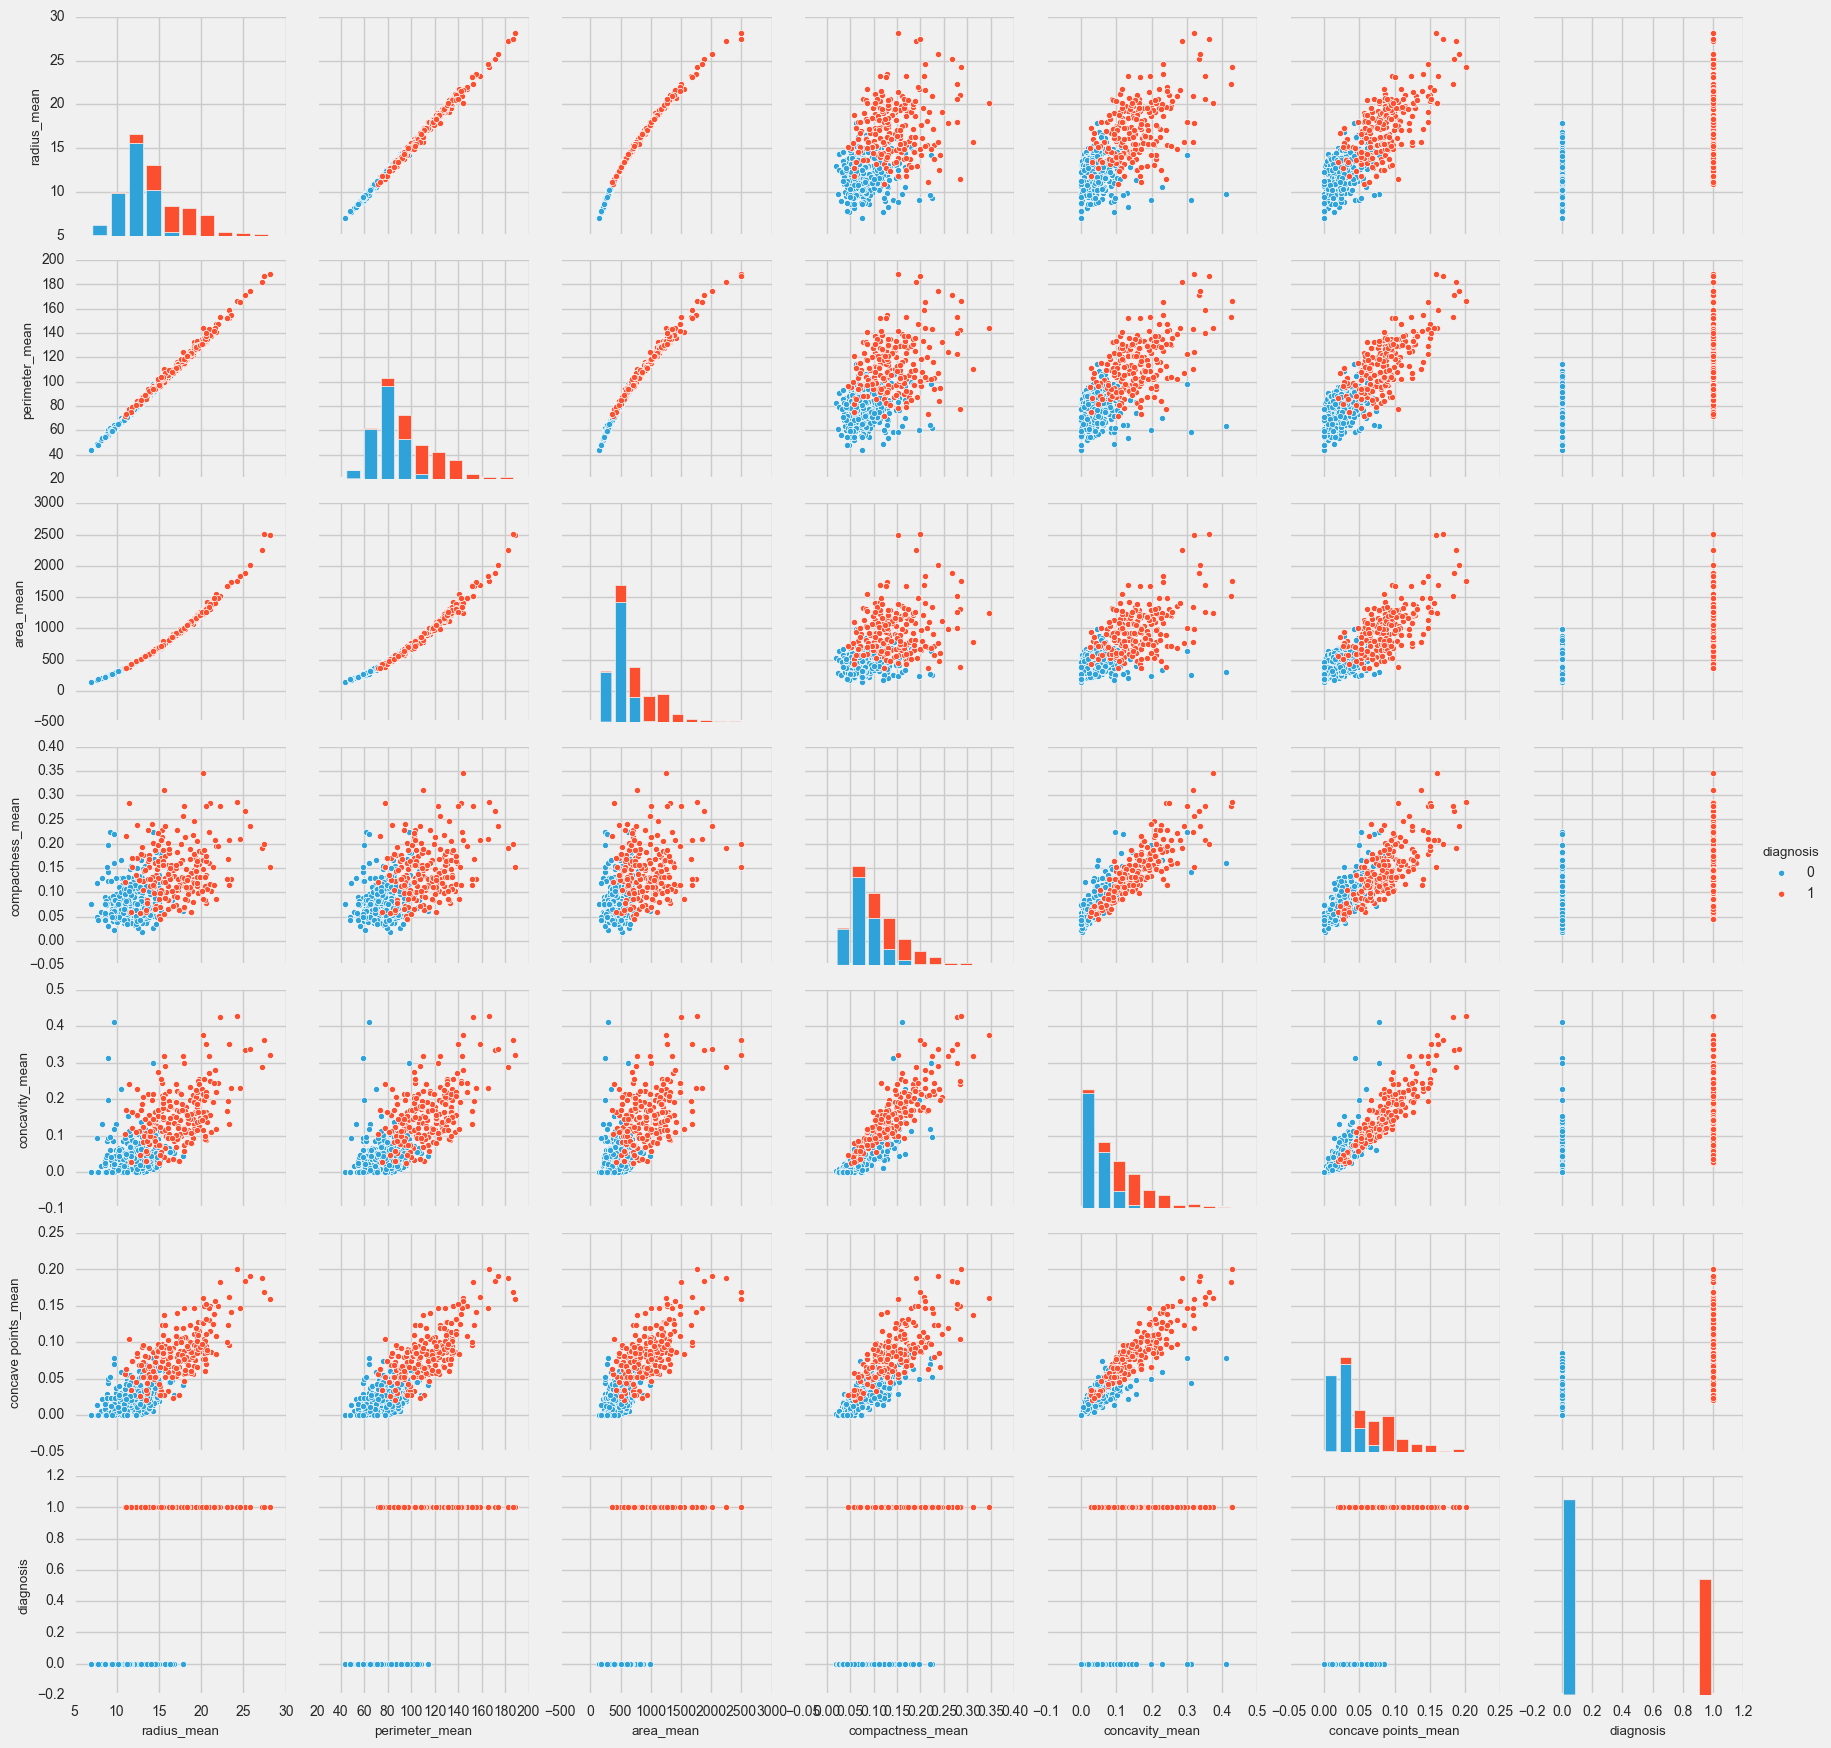

In [104]:
data1=data[['radius_mean', 'perimeter_mean', 'area_mean', 'compactness_mean', 'concavity_mean', 'concave points_mean', 'diagnosis']]
sns.pairplot(data1,hue= 'diagnosis')
plt.show()

<h3>Decrypting insights using Violin and Swarm Plots</h3>

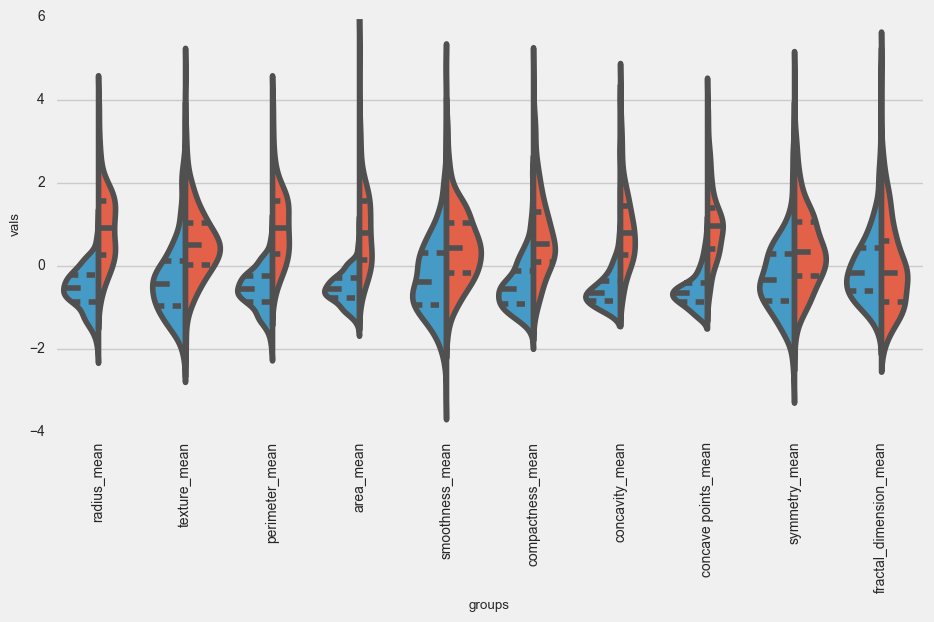

In [57]:
plt.figure(figsize=(10,5))
data1= (data - data.mean()) / (data.std())
data2= data1[data1.columns[:11]]
data2= pd.melt(data2, id_vars='diagnosis', var_name='groups', value_name='vals')
sns.violinplot('groups', 'vals', data=data2, hue='diagnosis', split=True, inner="quart")
plt.xticks(rotation=90)
plt.legend().set_visible(False)
plt.show()

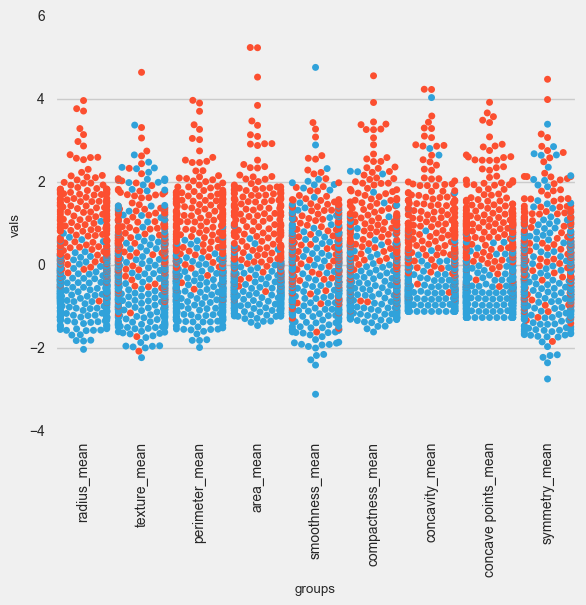

In [58]:
plt.figure(figsize=(6,5))
data3= (data - data.mean()) / (data.std())
data4= data3[data3.columns[:10]]
data4= pd.melt(data4, id_vars='diagnosis', var_name='groups', value_name='vals')
sns.swarmplot('groups', 'vals', data=data4, hue='diagnosis')
plt.legend().set_visible(False)
plt.xticks(rotation=90)
plt.show()

<h1>Machine Learning Models</h1>

In [59]:
from sklearn.linear_model import LogisticRegression #  Logistic regression
#from sklearn.model_selection import train_test_split #  split the data into two parts
from sklearn.cross_validation import KFold #  cross validation
from sklearn.ensemble import RandomForestClassifier # random forest classifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn import svm # for Support Vector Machine
from sklearn import metrics #  check the error and accuracy of the model
#from sklearn.model_selection import cross_val_score
from sklearn.cross_validation import train_test_split
from sklearn.metrics import f1_score,confusion_matrix # to calculate and plot the cm
from sklearn.metrics import accuracy_score

In [50]:
data['diagnosis'] = data['diagnosis'].map({'M':1,'B':0})

In [60]:
data.head()

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


### Working with all the features

In [194]:
train,test=train_test_split(data,test_size=0.3,random_state=0,stratify=data['diagnosis'])

In [195]:
train_X=train[train.columns[1:]]
train_y=train['diagnosis']
test_X=test[test.columns[1:]]
test_y=test['diagnosis']

#### Logistic Regression

0.917398945518


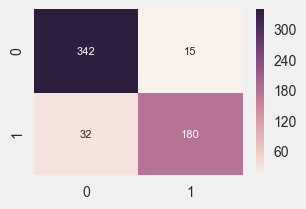

In [82]:
plt.figure(figsize=(3,2))
model=LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
model1=metrics.accuracy_score(prediction,test_y)
print(model1)
cm = confusion_matrix(test_y,prediction)
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

#### K-Nearest Neighbours

0.93567251462


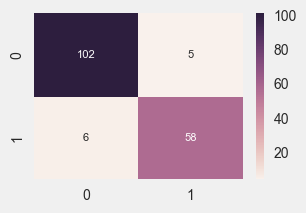

In [174]:
plt.figure(figsize=(3,2))
model=KNeighborsClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
model2=metrics.accuracy_score(prediction,test_y)
print(model2)
cm = confusion_matrix(test_y,prediction)
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

#### SVM

0.959578207381


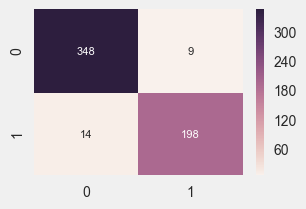

In [179]:
plt.figure(figsize=(3,2))
model=svm.SVC(kernel='linear')
model.fit(train_X,train_y)
prediction=model.predict(test_X)
model3=metrics.accuracy_score(prediction,test_y)
print(model3)
cm = confusion_matrix(test_y,prediction)
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

#### Random Forest

0.941520467836


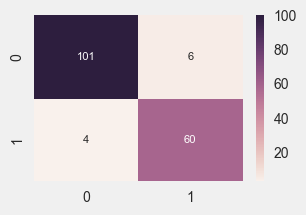

In [199]:
plt.figure(figsize=(3,2))
model=RandomForestClassifier(n_estimators=70)
model.fit(train_X,train_y)
prediction=model.predict(test_X)
model4_1=metrics.accuracy_score(prediction,test_y)
print(model4_1)
cm = confusion_matrix(test_y,prediction)
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

<h3>Comparing the Various Machine Learning Models</h3>

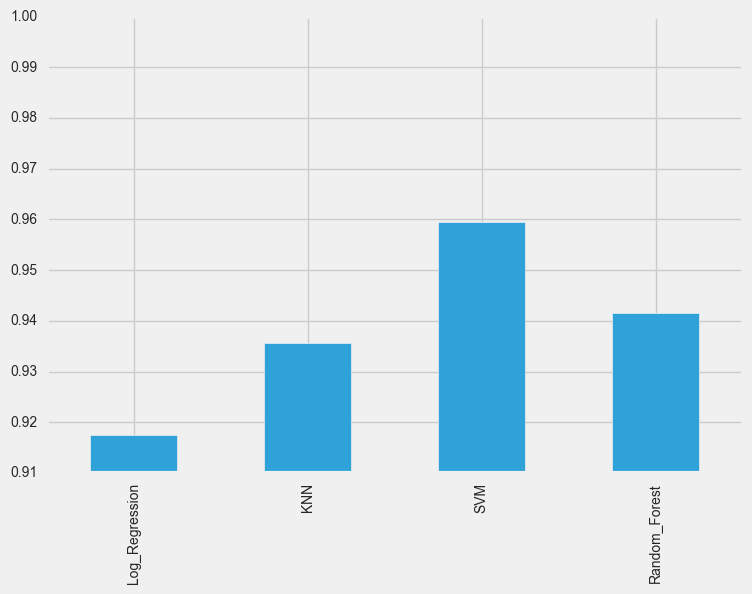

In [200]:
plt.figure(figsize=(1,1))
names=['Log_Regression','KNN','SVM','Random_Forest']
models=[]
models.extend([model1,model2,model3,model4_1])
df=pd.DataFrame(models,index=names)
df.plot.bar()
plt.ylim(0.91,1)
plt.legend().set_visible(False)
plt.show()

### SVM Models

I've tried the two different SVM models that are:

1)Linear(Giving the best accuracy)

2)Radial Based(Least Accuracy)


### Code for all the SVM's

In [99]:
model=svm.SVC(kernel='linear')  #linear
model.fit(train_X,train_y)
prediction=model.predict(test_X)
model3=metrics.accuracy_score(prediction,test_y)
print(model3)

0.959578207381


In [103]:
model=svm.SVC(kernel='rbf')  #Radial Based
model.fit(train_X,train_y)
prediction=model.predict(test_X)
model3=metrics.accuracy_score(prediction,test_y)
print(model3)

0.625730994152


<h1> Implementing SVD on the Dataset </h1>

In [74]:
from scipy import linalg
data_svd=data.copy()
data_svd.head(5)

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,1,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,...,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,...,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,1,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,...,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,1,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,...,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,1,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,...,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [75]:
svd_try=data[data.columns[1:]]

<h4>Importing the required packages and initializing the SVD variable</h4>

In [76]:
from sklearn.decomposition import TruncatedSVD
from sklearn.random_projection import sparse_random_matrix
X = sparse_random_matrix(100, 100, density=0.01, random_state=42)
svd = TruncatedSVD(n_components=15, n_iter=4, random_state=42)

In [77]:
output=data['diagnosis']
test_case=data[data.columns[1:]]

trying=svd.fit(test_case,output)
abc=svd.fit_transform(test_case,output)

In [78]:
svd_try=pd.DataFrame(abc)

In [184]:
train,test=train_test_split(svd_try,test_size=0.25,random_state=0)

In [185]:
svd_try['16']=output.values
svd_try.columns=[['1','2','3','4','5','6','7','8','9','10','11','12','13','14','15','16']]
train_X=svd_try[svd_try.columns[:7]]
train_y=svd_try['16']
test_X=svd_try[svd_try.columns[:7]]
test_y=svd_try['16']


In [81]:
svd_try.head()

,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16
0,2241.974276,347.715561,-27.538078,60.013511,25.695124,0.964387,-0.266877,0.592403,0.503766,-0.171883,0.170615,-0.053355,0.058661,-0.021558,0.017102,1
1,2372.408403,56.901674,23.872454,-47.683138,-1.930380,3.361383,0.757992,0.135568,-0.392309,0.009178,-0.011064,0.023468,0.062209,-0.013702,0.005422,1
2,2101.840280,11.947630,30.416873,-11.309098,-2.869229,0.190264,-0.033432,0.138478,-0.332147,0.191545,-0.019189,0.011817,0.013725,-0.002932,-0.021684,1
3,697.432105,-2.127689,-46.814937,27.333251,-0.927720,-3.490276,-0.253709,-0.069228,0.014334,0.375728,-0.164676,-0.082129,0.080865,0.048881,0.006199,1
4,2047.087229,-137.765121,67.494249,-22.762752,-0.336755,0.836243,1.426414,0.491521,-0.002292,0.131957,0.103384,0.021320,-0.057940,0.070516,-0.008519,1


<h3>SVM with SVD</h3>

0.970760233918


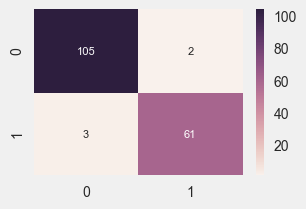

In [72]:
plt.figure(figsize=(3,2))
model=svm.SVC(kernel='linear')
model.fit(train_X,train_y)
prediction=model.predict(test_X)
model1_svd=metrics.accuracy_score(prediction,test_y)
print(model1_svd)
cm = confusion_matrix(test_y,prediction)
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

<h3>Logistic Regression with SVD</h3>

0.964912280702


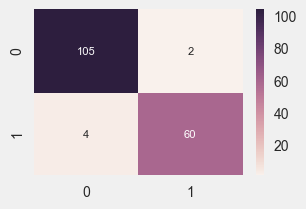

In [71]:
plt.figure(figsize=(3,2))
model=LogisticRegression()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
model2_svd=metrics.accuracy_score(prediction,test_y)
print(model2_svd)
cm = confusion_matrix(test_y,prediction)
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

<h3>K Nearest Neighbours with SVD</h3>

0.945518453427


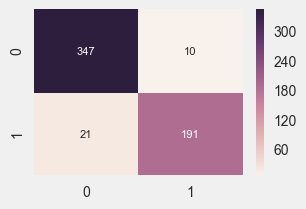

In [186]:
plt.figure(figsize=(3,2))
model=KNeighborsClassifier()
model.fit(train_X,train_y)
prediction=model.predict(test_X)
model3_svd=metrics.accuracy_score(prediction,test_y)
print(model3_svd)
cm = confusion_matrix(test_y,prediction)
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

<h3>Comparing the various algorithms after applying SVD</h3>

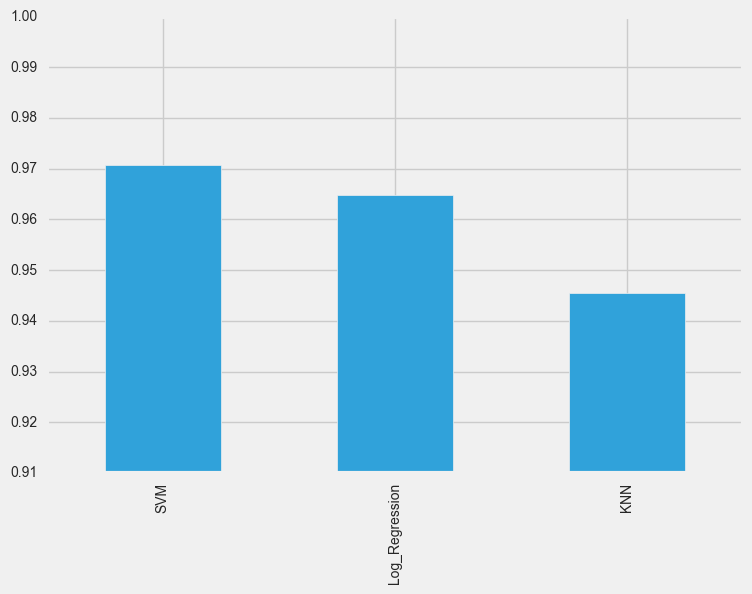

In [188]:
plt.figure(figsize=(1,1))
names=['SVM','Log_Regression','KNN']
models=[]
models.extend([model1_svd,model2_svd,model3_svd])
df=pd.DataFrame(models,index=names)
df.plot.bar()
plt.ylim(0.91,1)
plt.legend().set_visible(False)
plt.show()

<h1>Feature Selection Using Correlation</h1>

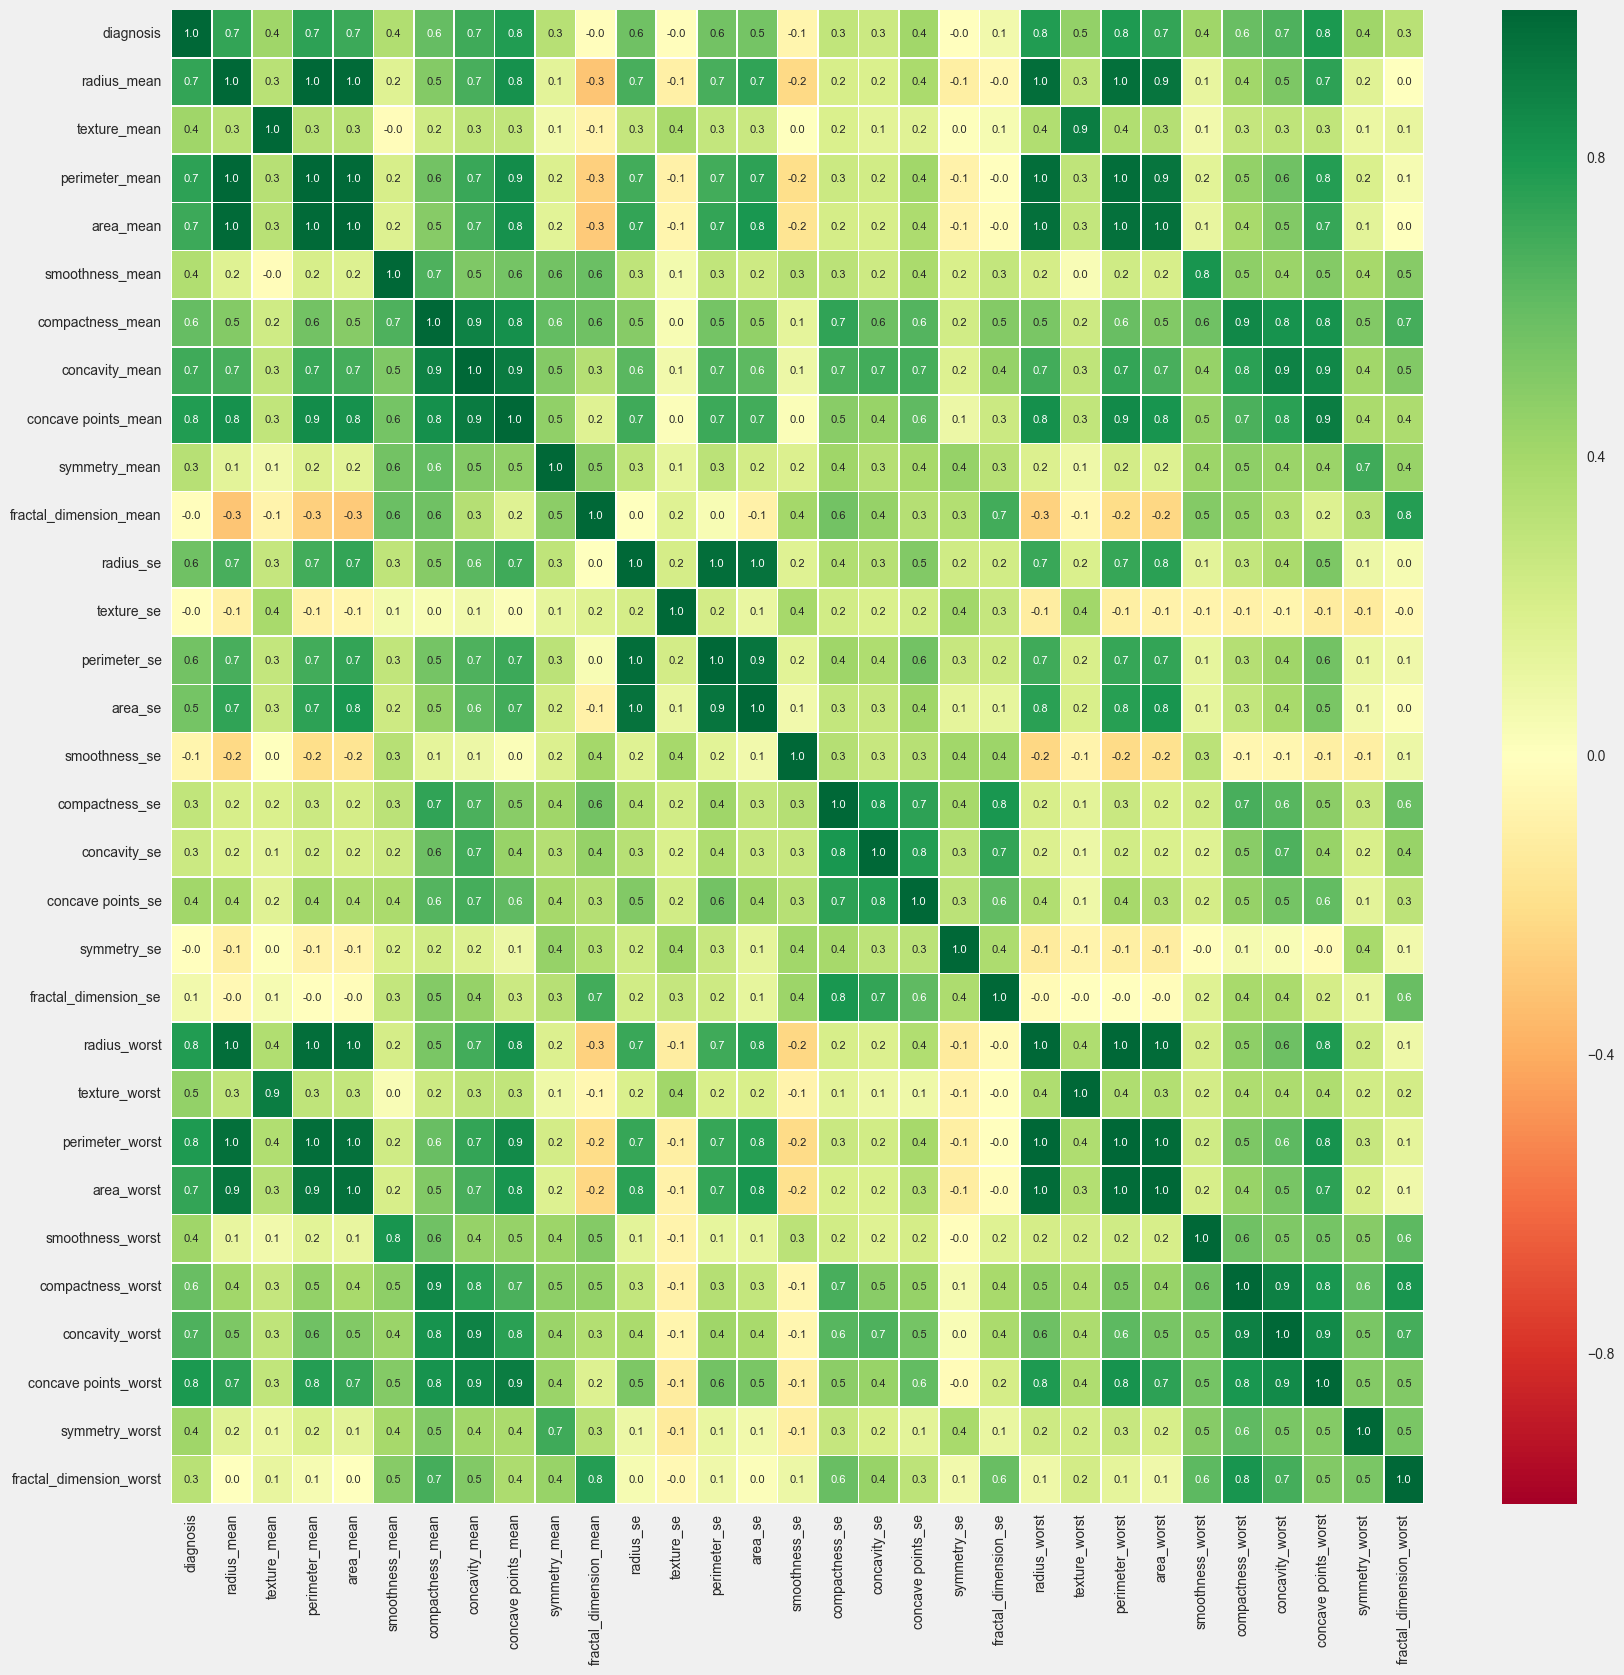

In [106]:
f,ax = plt.subplots(figsize=(18, 18))
sns.heatmap(data.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap='RdYlGn')
plt.show()

As it can be seen in heatmap figure <b>radius_mean, perimeter_mean and area_mean</b> are correlated with each other so we will use only <b>area_mean</b>.<br><br>
<b>Compactness_mean, concavity_mean and concave points_mean</b> are correlated with each other.Therefore we only choose <b>concavity_mean</b>.<br><br> Apart from these, <b>radius_se, perimeter_se and area_se</b> are correlated and we only use <b>area_se</b>.<br><br>Also, <b>radius_worst, perimeter_worst and area_worst</b>  are correlated with each other so we use <b>area_worst</b>.<br><br> <b>Compactness_worst, concavity_worst and concave points_worst</b>  are correlated with each other so we use <b>concavity_worst.</b><br><br> <b>Compactness_se, concavity_se and concave points_se</b>  are correlated with each other so we use <b>concavity_se</b>.<br><br> <b>texture_mean and texture_worst</b>  are correlated with each other so we use <b>texture_mean</b>. <br><br><b>area_worst and area_mean</b>  are correlated with each other so we use <b>area_mean</b>.

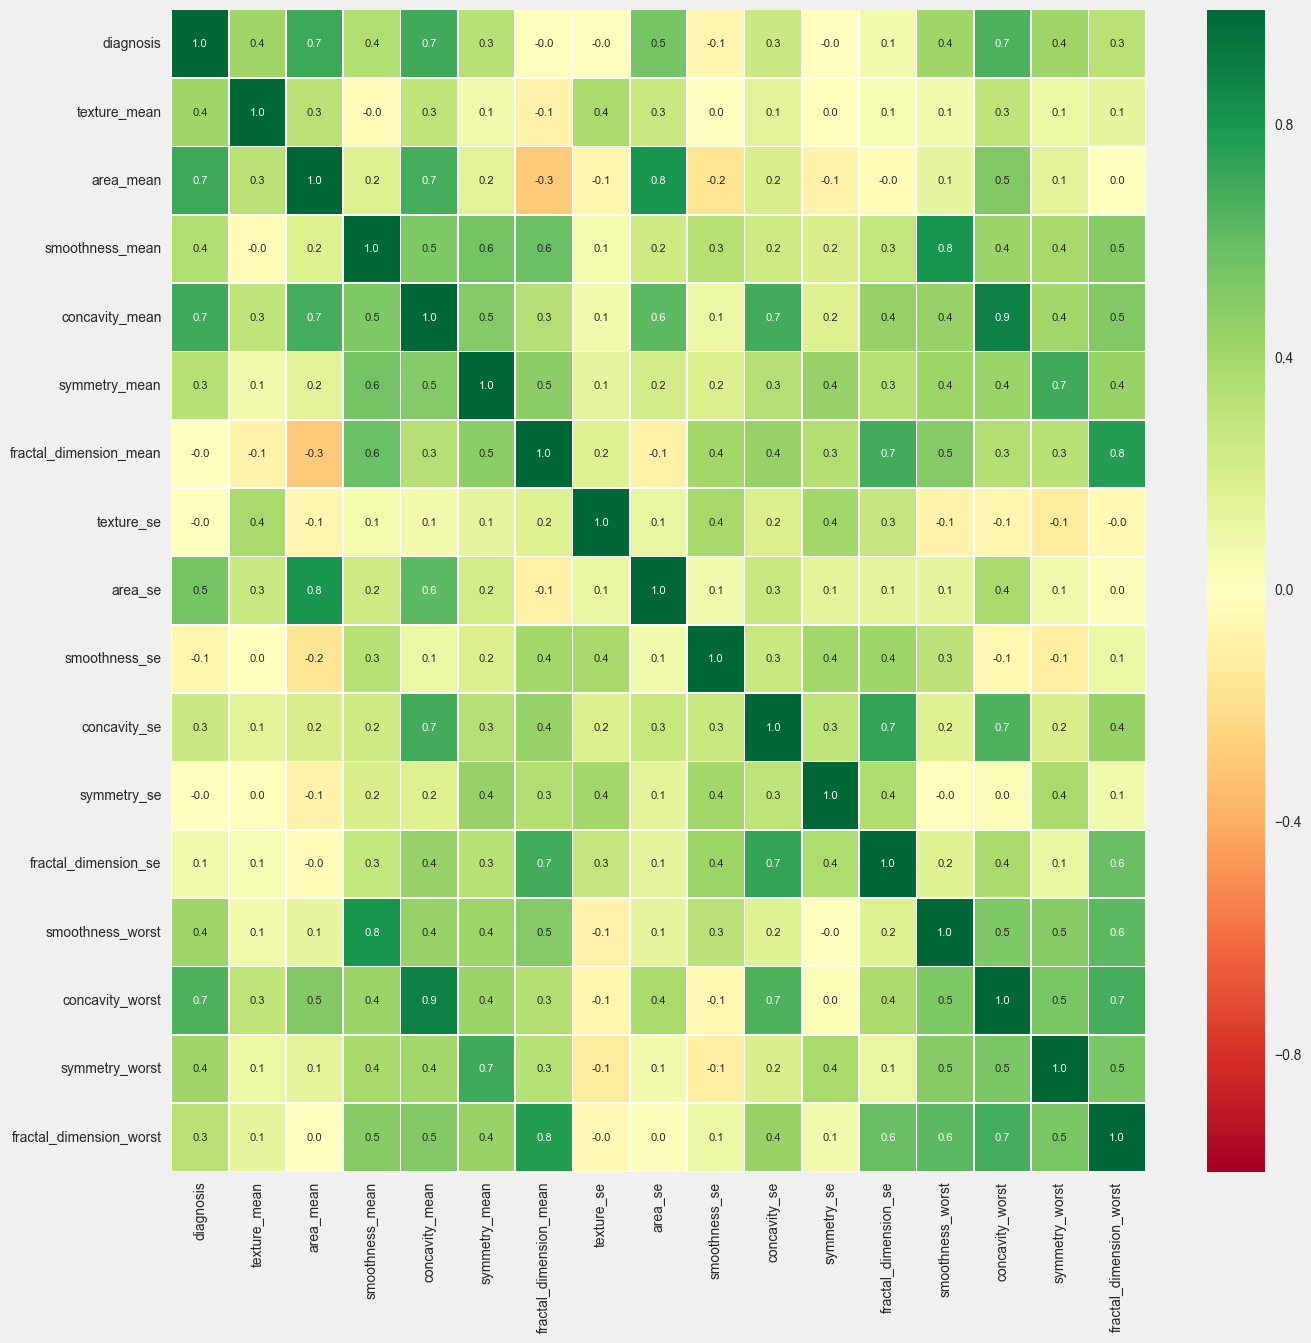

In [107]:
drop_list1 = ['perimeter_mean','radius_mean','compactness_mean','concave points_mean','radius_se','perimeter_se','radius_worst','perimeter_worst','compactness_worst','concave points_worst','compactness_se','concave points_se','texture_worst','area_worst']
x_1 = data.drop(drop_list1,axis = 1 )         
#correlation map
f,ax = plt.subplots(figsize=(14, 14))
sns.heatmap(x_1.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, cmap='RdYlGn')
plt.show()


In [108]:
train,test=train_test_split(x_1,test_size=0.3,random_state=0,stratify=data['diagnosis'])
train_X=train[train.columns[1:]]
train_y=train['diagnosis']
test_X=test[test.columns[1:]]
test_y=test['diagnosis']

<h3>Random Forest with Feature Selection (Using Correlation)</h3>

0.953216374269


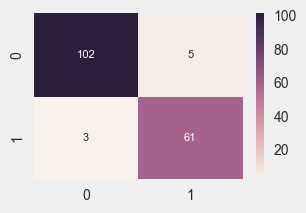

In [109]:
plt.figure(figsize=(3,2))
model=RandomForestClassifier(n_estimators=50)
model.fit(train_X,train_y)
prediction=model.predict(test_X)
model4=metrics.accuracy_score(prediction,test_y)
print(model4)
cm = confusion_matrix(test_y,prediction)
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

<h1>Univariate Feature Selection</h1> 

In univariate feature selection, we will use SelectKBest that removes all but the k highest scoring features<br>
In this method we need to choose how many features we will use. 
<br>I do not try all combinations but only choose k = 5 and find best 5 features.

In [147]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
# find best scored 5 features
select_feature = SelectKBest(chi2, k=5).fit(train_X, train_y)

In [148]:
print('Score list:', select_feature.scores_)
print('Feature list:', train_X.columns)

('Score list:', array([  6.16783951e+01,   3.70409260e+04,   1.54591218e-01,
         1.59923360e+01,   1.89422977e-01,   9.90553335e-04,
         1.52211032e-02,   6.19493508e+03,   3.94966295e-04,
         1.01137512e+00,   3.73077051e-04,   6.78991505e-03,
         3.38964076e-01,   3.17182889e+01,   9.70290800e-01,
         2.11569521e-01]))
('Feature list:', Index([u'texture_mean', u'area_mean', u'smoothness_mean', u'concavity_mean',
       u'symmetry_mean', u'fractal_dimension_mean', u'texture_se', u'area_se',
       u'smoothness_se', u'concavity_se', u'symmetry_se',
       u'fractal_dimension_se', u'smoothness_worst', u'concavity_worst',
       u'symmetry_worst', u'fractal_dimension_worst'],
      dtype='object'))


Best 5 feature to classify is that <b>area_mean, area_se, texture_mean, concavity_worst and concavity_mean</b>. So lets se what happens if we use only these best scored 5 feature.

<h3>Random Forest with Univariate Feature Selection</h3>

0.947368421053


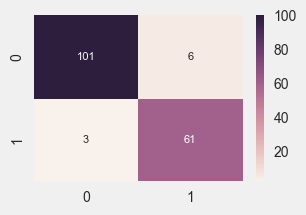

In [163]:
x_train_2 = select_feature.transform(train_X)
x_test_2 = select_feature.transform(test_X)
#random forest classifier
plt.figure(figsize=(3,2))
model=RandomForestClassifier(n_estimators=43)
model.fit(x_train_2,train_y)
prediction=model.predict(x_test_2)
model4=metrics.accuracy_score(prediction,test_y)
print(model4)
cm = confusion_matrix(test_y,prediction)
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

<h1> Recursive feature elimination (RFE)</h1>

In [140]:
from sklearn.feature_selection import RFE
# Create the RFE object and rank each pixel
clf_rf_3 = RandomForestClassifier()      
rfe = RFE(estimator=clf_rf_3, n_features_to_select=5, step=1)
rfe = rfe.fit(train_X, train_y)

In [141]:
print('Chosen best 5 feature by rfe:',train_X.columns[rfe.support_])

('Chosen best 5 feature by rfe:', Index([u'area_mean', u'concavity_mean', u'area_se', u'smoothness_worst',
       u'concavity_worst'],
      dtype='object'))


Chosen 5 best features by rfe is <b>texture_mean, area_mean, concavity_mean, area_se, concavity_worst</b>. They are exactly similar with previous (selectkBest) method. Therefore we do not need to calculate accuracy again. However there is a problem,  we find best 5 feature with two different method and these features are same but why it is 5. Maybe if we use best 2 or best 15 feature we will have better accuracy. Therefore lets see how many feature we need to use with rfecv method.

<h1> Recursive feature elimination with cross validation</h1>

In [142]:
from sklearn.feature_selection import RFECV

# The "accuracy" scoring is proportional to the number of correct classifications
clf_rf_4 = RandomForestClassifier() 
rfecv = RFECV(estimator=clf_rf_4, step=1, cv=5,scoring='accuracy')   #5-fold cross-validation
rfecv = rfecv.fit(train_X, train_y)

print('Optimal number of features :', rfecv.n_features_)
print('Best features :', train_X.columns[rfecv.support_])

('Optimal number of features :', 13)
('Best features :', Index([u'texture_mean', u'area_mean', u'smoothness_mean', u'concavity_mean',
       u'symmetry_mean', u'fractal_dimension_mean', u'area_se',
       u'smoothness_se', u'concavity_se', u'smoothness_worst',
       u'concavity_worst', u'symmetry_worst', u'fractal_dimension_worst'],
      dtype='object'))


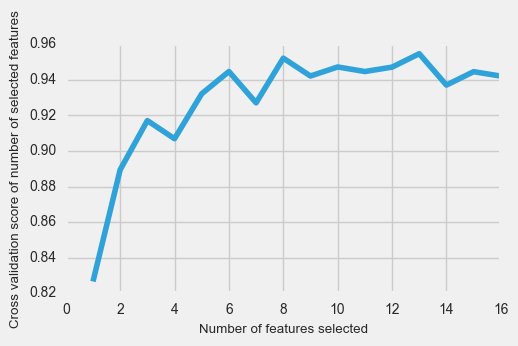

In [143]:
# Plot number of features VS. cross-validation scores
import matplotlib.pyplot as plt
plt.figure(figsize=(5,3))
plt.xlabel("Number of features selected")
plt.ylabel("Cross validation score of number of selected features")
plt.plot(range(1, len(rfecv.grid_scores_) + 1), rfecv.grid_scores_)
plt.show()


<h3>Revisiting Univariate Feature Selection using results from cross validation</h3>

In [165]:
# find best scored 6 features
select_feature = SelectKBest(chi2, k=6).fit(train_X, train_y)

In [166]:
print('Score list:', select_feature.scores_)
print('Feature list:', train_X.columns)

('Score list:', array([  6.16783951e+01,   3.70409260e+04,   1.54591218e-01,
         1.59923360e+01,   1.89422977e-01,   9.90553335e-04,
         1.52211032e-02,   6.19493508e+03,   3.94966295e-04,
         1.01137512e+00,   3.73077051e-04,   6.78991505e-03,
         3.38964076e-01,   3.17182889e+01,   9.70290800e-01,
         2.11569521e-01]))
('Feature list:', Index([u'texture_mean', u'area_mean', u'smoothness_mean', u'concavity_mean',
       u'symmetry_mean', u'fractal_dimension_mean', u'texture_se', u'area_se',
       u'smoothness_se', u'concavity_se', u'symmetry_se',
       u'fractal_dimension_se', u'smoothness_worst', u'concavity_worst',
       u'symmetry_worst', u'fractal_dimension_worst'],
      dtype='object'))


0.964912280702


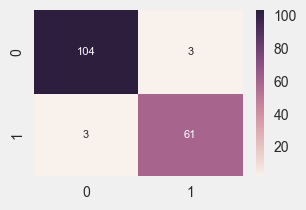

In [169]:
x_train_2 = select_feature.transform(train_X)
x_test_2 = select_feature.transform(test_X)
#random forest classifier
plt.figure(figsize=(3,2))
model=RandomForestClassifier(n_estimators=46)
model.fit(x_train_2,train_y)
prediction=model.predict(x_test_2)
model4=metrics.accuracy_score(prediction,test_y)
print(model4)
cm = confusion_matrix(test_y,prediction)
sns.heatmap(cm,annot=True,fmt="d")
plt.show()

<h1>Tree based feature selection</h1>

In random forest classification method there is a <b>featureimportances</b> attributes that is the feature importances (the higher, the more important the feature). To use <b>feature_importance</b> method, in training data there should not be correlated features. Random forest choose randomly at each iteration, therefore sequence of feature importance list can change.

Feature ranking:
1. feature 1 (0.267064)
2. feature 7 (0.214917)
3. feature 3 (0.124211)
4. feature 13 (0.121564)
5. feature 2 (0.067296)
6. feature 9 (0.037650)
7. feature 4 (0.032143)
8. feature 12 (0.031574)
9. feature 14 (0.024159)
10. feature 15 (0.016307)
11. feature 11 (0.015834)
12. feature 5 (0.012449)
13. feature 0 (0.011207)
14. feature 6 (0.010768)
15. feature 10 (0.008436)
16. feature 8 (0.004420)


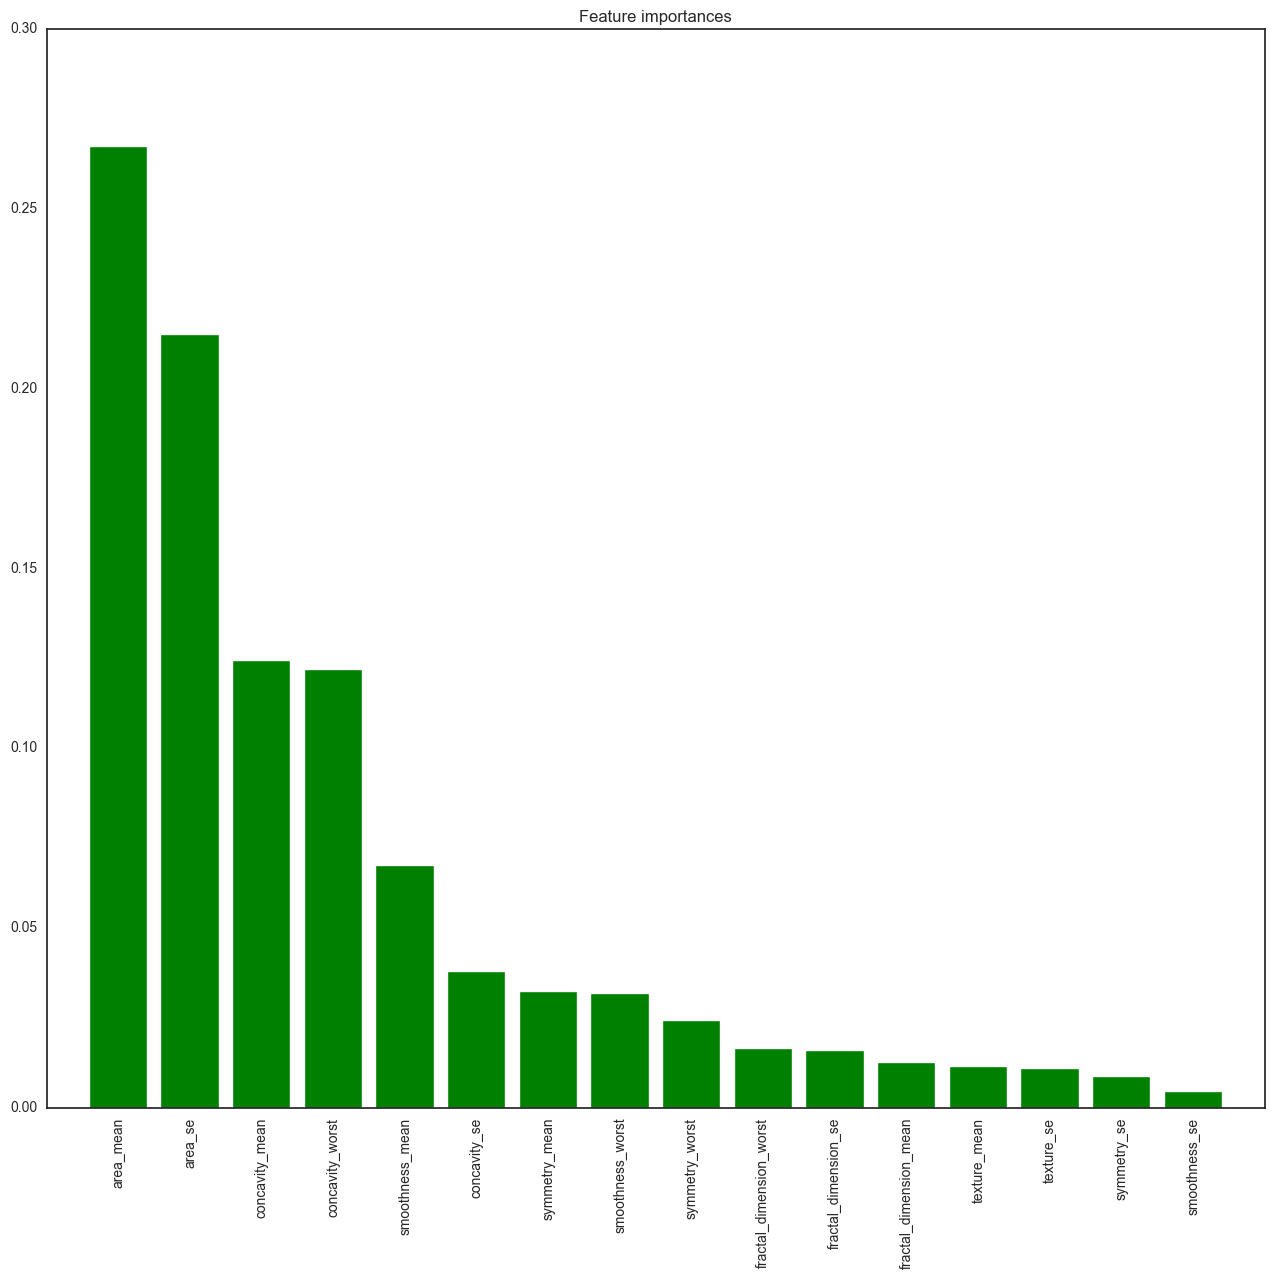

In [160]:
clf_rf = RandomForestClassifier(random_state=43)  
clf_rf_5 = RandomForestClassifier()      
clr_rf_5 = clf_rf_5.fit(train_X,train_y)
importances = clr_rf_5.feature_importances_
std = np.std([tree.feature_importances_ for tree in clf_rf.estimators_],
             axis=0)
indices = np.argsort(importances)[::-1]

# Print the feature ranking
print("Feature ranking:")

for f in range(train_X.shape[1]):
    print("%d. feature %d (%f)" % (f + 1, indices[f], importances[indices[f]]))

# Plot the feature importances of the forest

plt.figure(1, figsize=(14, 13))
plt.title("Feature importances")
plt.bar(range(train_X.shape[1]), importances[indices],
       color="g",  align="center")
plt.xticks(range(train_X.shape[1]), train_X.columns[indices],rotation=90)
plt.xlim([-1, train_X.shape[1]])
plt.show()

Thus we have successfully managed to implement the various classification algorithms and also significantly reduce the number of features while infact increasing the accuracy

<h1>THE END</h1>